In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [35]:
df = pd.read_csv("data.csv")

In [36]:
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [37]:
print(df['diagnosis'].value_counts())
print(df.dtypes)

diagnosis
B    357
M    212
Name: count, dtype: int64
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
c

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['diagnosis']
Continuous Columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


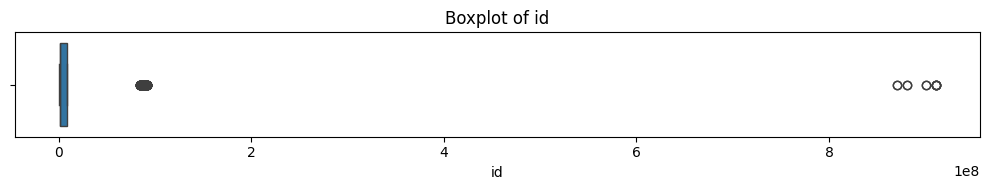

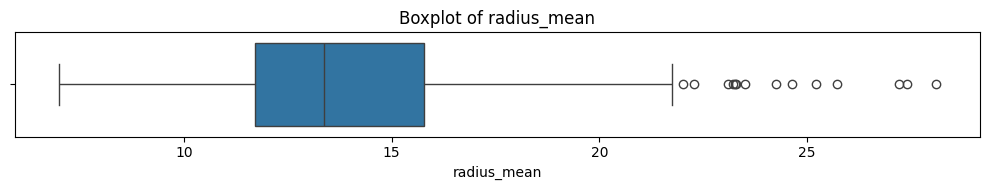

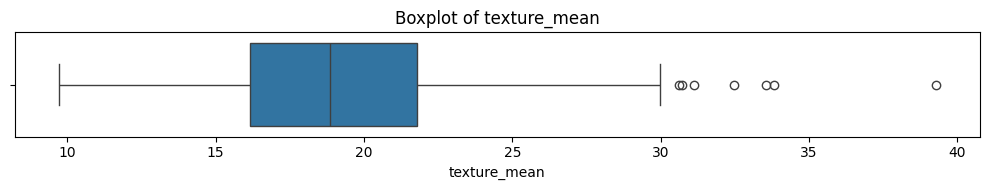

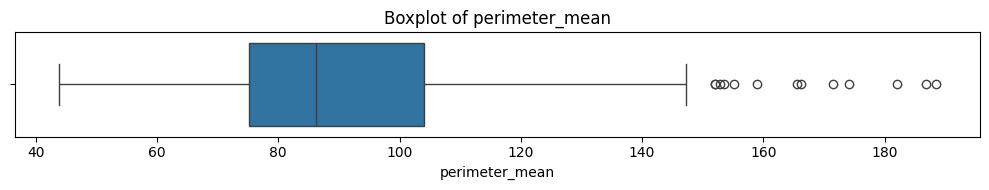

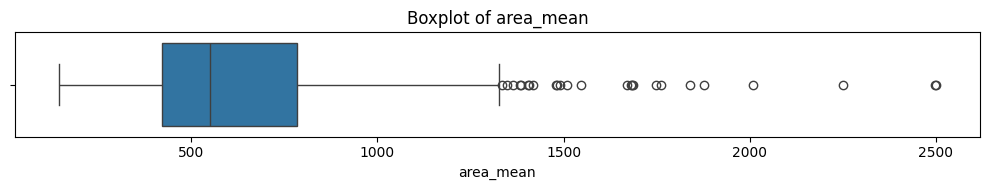

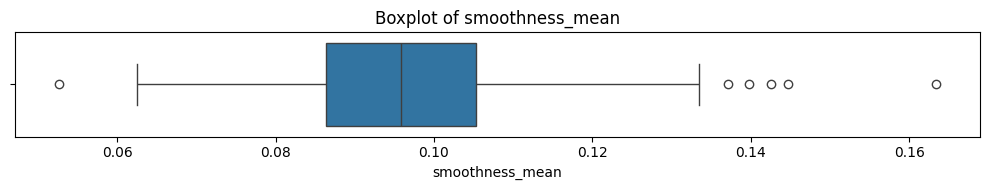

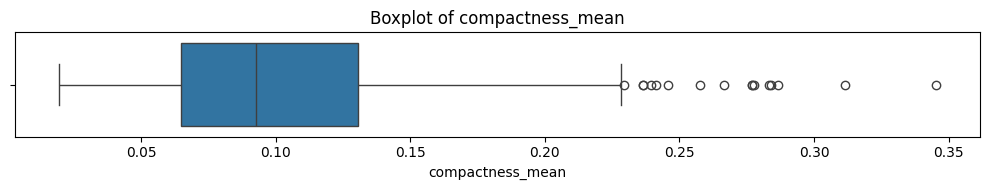

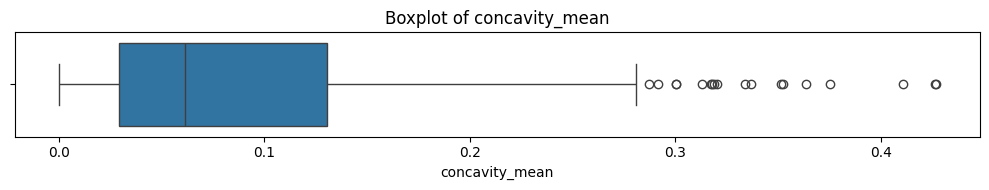

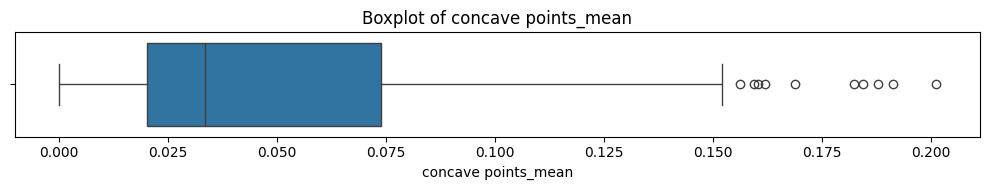

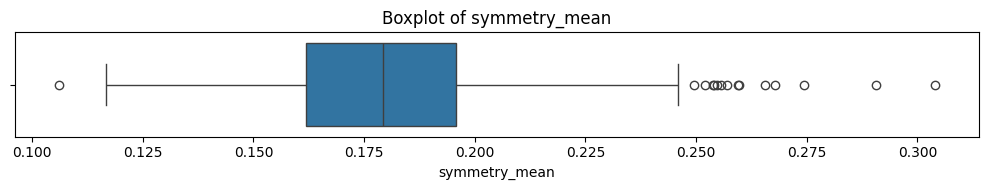

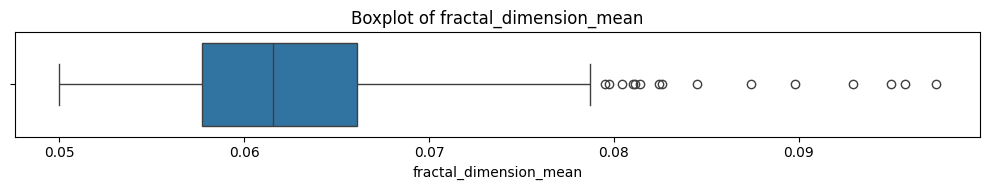

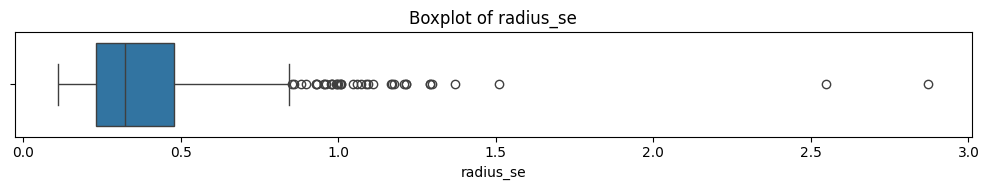

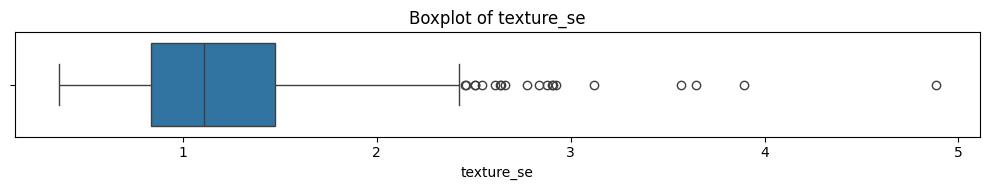

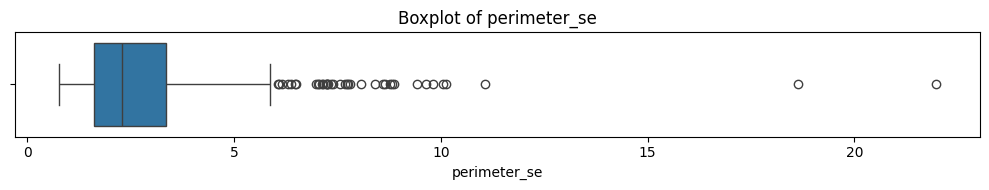

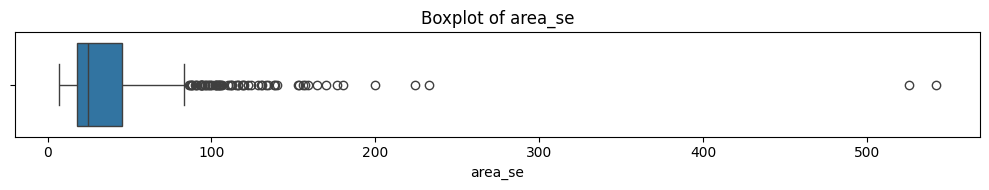

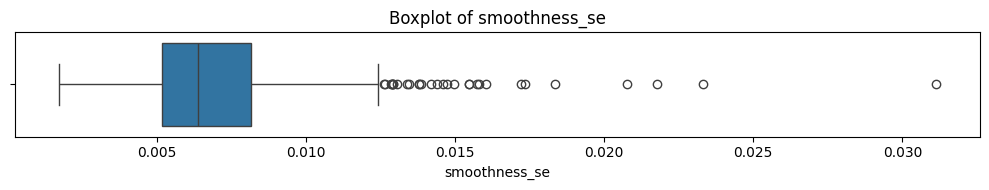

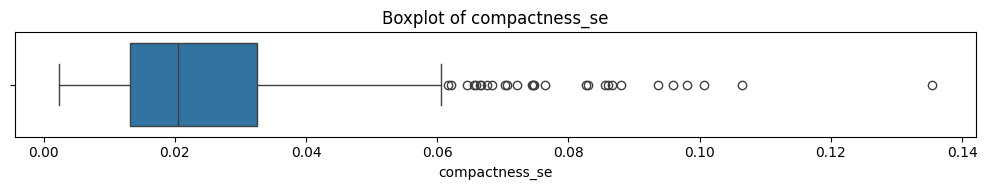

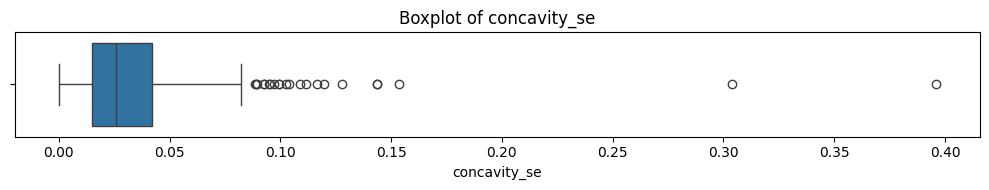

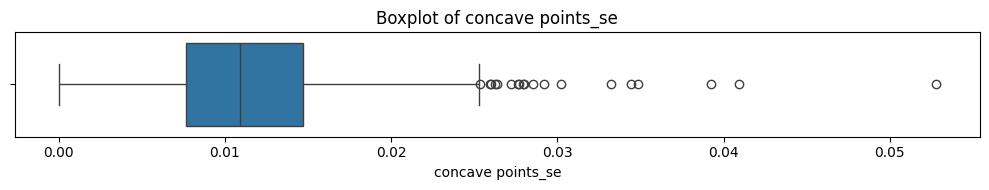

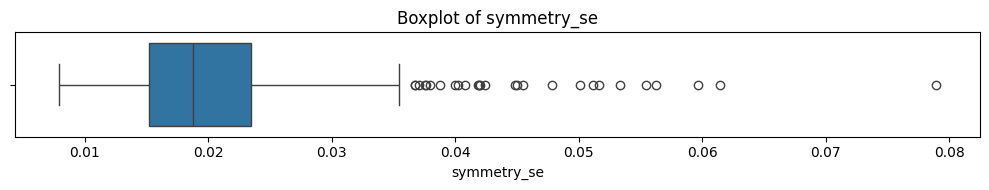

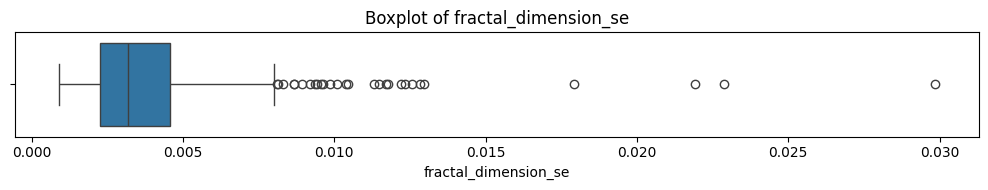

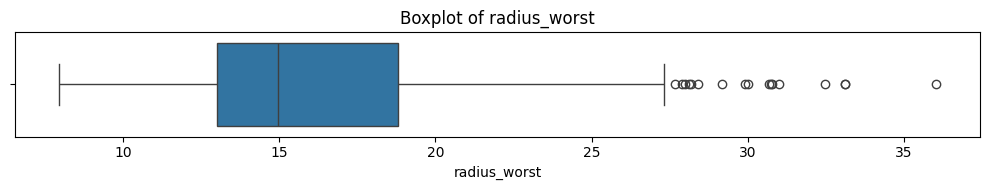

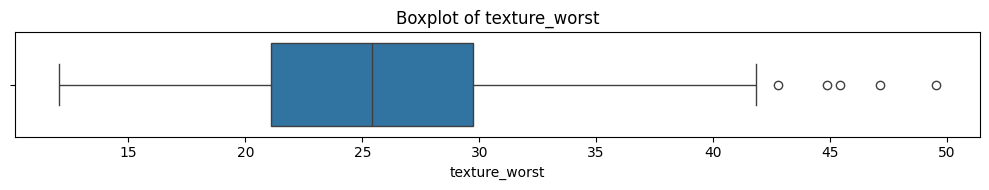

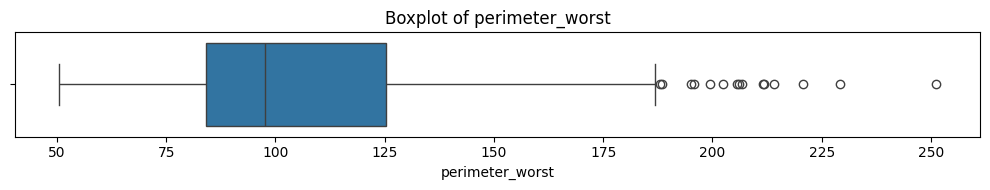

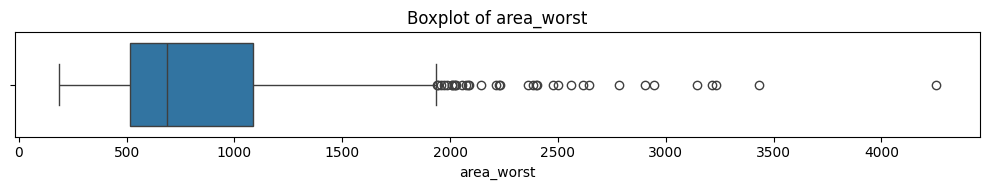

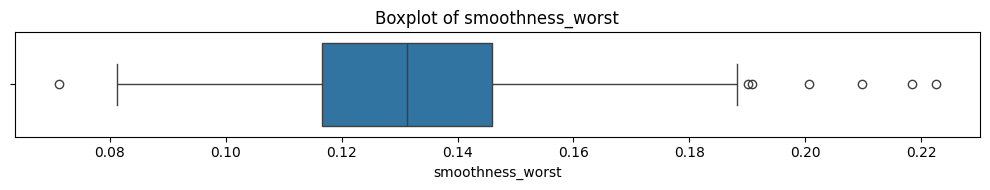

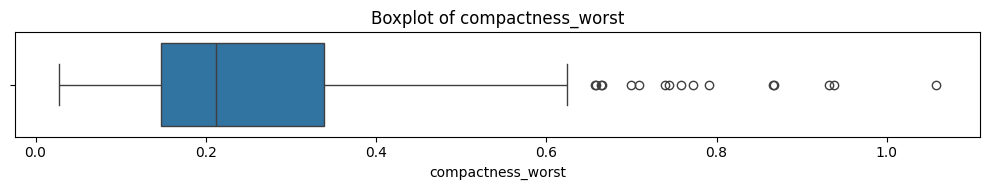

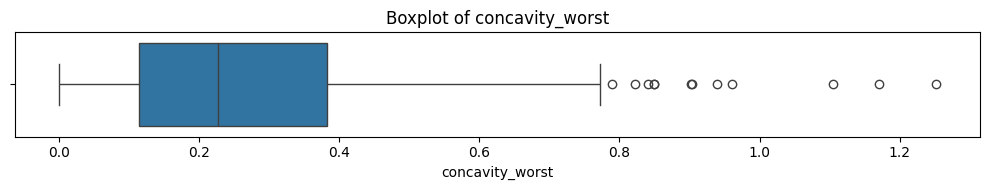

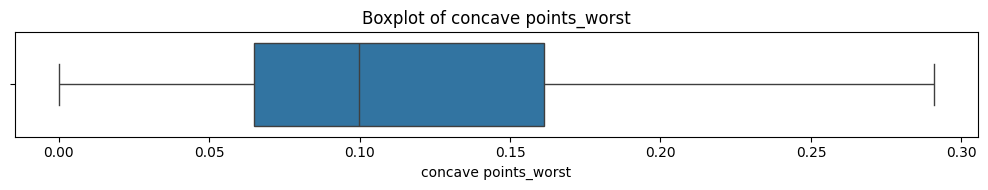

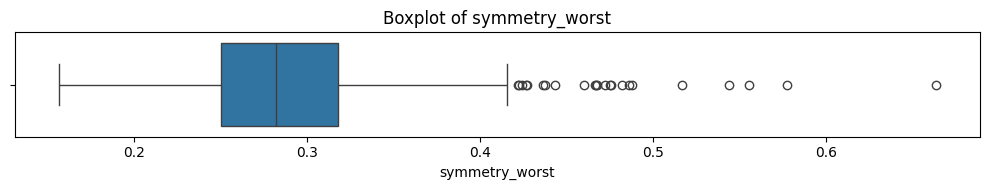

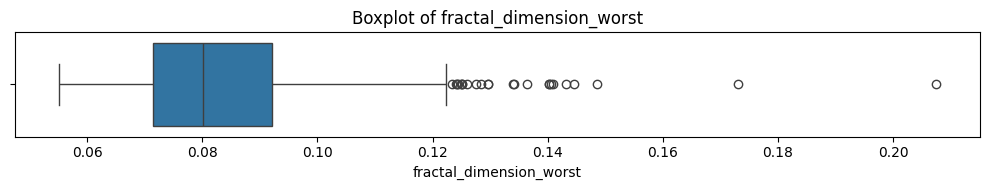

In [39]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Unnamed: 32': # Exclude the column with all NaN values
        plt.figure(figsize=(10, 2)) # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [45]:
#Outliers removal using Z score

from scipy import stats
# Define features (X) and target (y)
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'Unnamed: 32'])
y = df['diagnosis']
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]

print(f"Original number of samples: {len(X)}")
print(f"Number of samples after outlier removal: {len(X_filtered)}")

Original number of samples: 569
Number of samples after outlier removal: 495


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and label (using filtered data)
X = X_filtered
y = y_filtered

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (396, 30)
Shape of X_test_scaled: (99, 30)
Shape of y_train: (396,)
Shape of y_test: (99,)


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Confusion Matrix:
 [[60  1]
 [ 1 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

ROC-AUC Score: 0.999137187230371


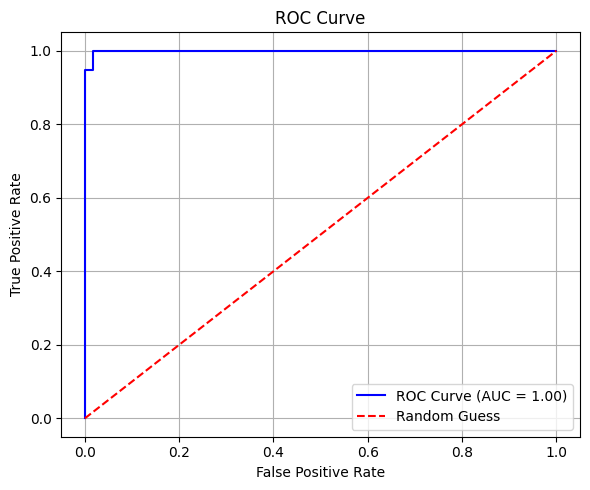

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Predict probabilities and labels
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)
y_pred_encoded = le.transform(y_pred)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_encoded))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_encoded))
print("ROC-AUC Score:", roc_auc_score(y_test_encoded, y_prob))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test_encoded, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
# setting a custom threshold
threshold = 0.6
y_custom_pred = (y_prob >= threshold).astype(int)

# Evaluate at custom threshold
print(confusion_matrix(y_test_encoded, y_custom_pred))
print(classification_report(y_test_encoded, y_custom_pred))

[[61  0]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99

